In [65]:
import numpy as np
import pandas as pd

In [66]:
import os
for dirname, _, filnames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [67]:
import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [68]:
df = pd.read_csv("winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [69]:
#Taking sum of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [70]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [71]:
# We will use mean of the entire column in place of missing data
df = df.fillna(df.mean())

In [72]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


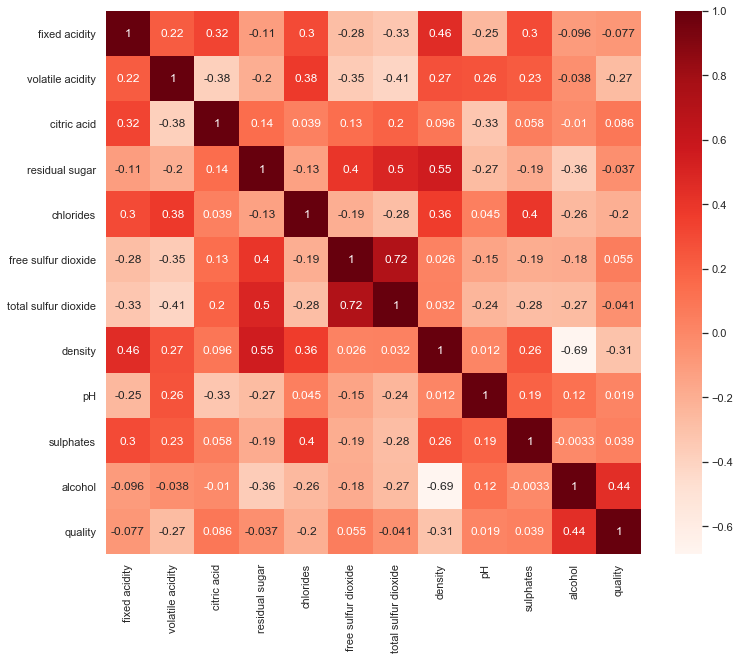

In [73]:
# This correlates each column with every other column in the data.
import seaborn as sns
sns.set(rc = {'figure.figsize': (12, 10)})
corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
            cmap = plt.cm.Reds)
plt.show()

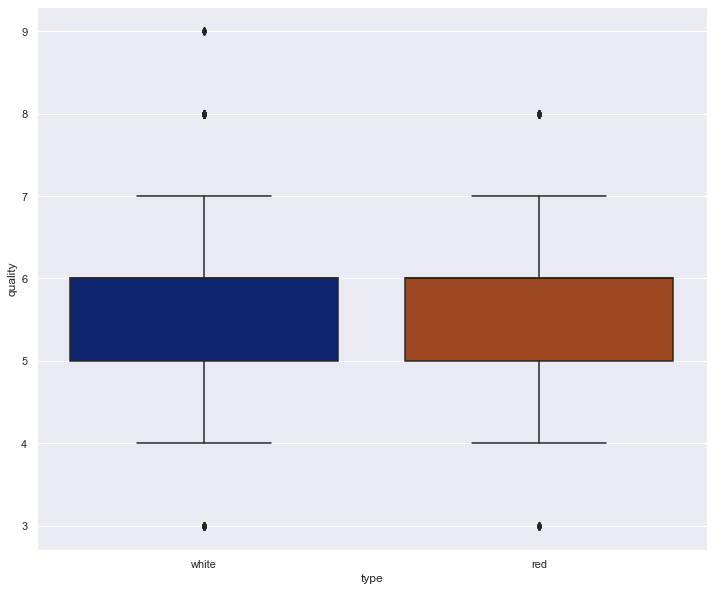

In [74]:
# This checks if the colour of the wine has any role in its quality. And we can see that there is no significant differnce.
sns.boxplot(x = 'type', y = 'quality', data = df, palette = 'dark')
plt.show()

In [75]:
# so we will remove the 'type' column.
df = df[df.columns.drop('type')]

In [76]:
# We will normalize the independent variables, and scale there values to a range of 0-1
x = df[df.columns.drop("quality")]
normalized_x = preprocessing.minmax_scale(x)
y = df["quality"]

In [77]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size = 0.3, random_state = 42)

# Models

Now we will fit different models to our data and check which has the highest accuracy, and why?

In [78]:
# simple linear regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train,y_train)
clf.score(X_train,y_train)

0.28601671838886256

In [79]:
# calculating mean square error on test data
from sklearn.metrics import mean_squared_error
a = clf.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print(train_rmse)
b = clf.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
test_rmse

0.7444922552489953


0.7122263008573606

In [80]:
# Mulitple linear regression with Lasso regression
from sklearn.linear_model import LassoCV
# alpha is hyperparameter 
alpha = np.arange(0.01,10,0.1).tolist()
clf = LassoCV(alphas=alpha).fit(X_train, y_train)
score =clf.score(X_train, y_train)
print("R^2 =", score)

a = clf.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print("train_rmse = ", train_rmse)

b = clf.predict(X_test)
test_rmse= (mean_squared_error(b, y_test)) ** 0.5
print("test_rmse = ", test_rmse)

R^2 = 0.23549461496929114
train_rmse =  0.7703825507069259
test_rmse =  0.7346798366263523


We can see that we have got substantially worse results compared to simple linear regression. With this we come to an end of the regression section and we have found regular linear regression to be the best model out of the two.

# Classification

In [81]:
# classsification  with K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 80)
knn.fit(X_train, y_train)
g = knn.predict(X_test)
metrics.accuracy_score(y_test, g)
acc = metrics.f1_score(y_test, g, average = 'micro')
print("F1-score = ", acc)

F1-score =  0.5446153846153846


In [82]:
# classification with Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
g = nb.predict(X_test)
metrics.accuracy_score(y_test, g)
acc = metrics.f1_score(y_test, g, average = 'micro')
print("F1-score = ", acc)

F1-score =  0.43846153846153846


In [83]:
# classification with Logistic Regression
from sklearn.linear_model import LogisticRegression
f = LogisticRegression(max_iter = 10000)
f.fit(X_train, y_train)
g  =f.predict(X_test)
metrics.accuracy_score(y_test, g)
acc = metrics.f1_score(y_test, g, average = 'micro')
print("F1-score = ", acc)

F1-score =  0.5497435897435897


In [84]:
# classification with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
f = DecisionTreeClassifier()
f.fit(X_train, y_train)
g = f.predict(X_test)
metrics.accuracy_score(y_test, g)
acc= metrics.f1_score(y_test, g, average = 'micro')
print('F1-score = ', acc)

F1-score =  0.6112820512820513


In [85]:
# classification with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
f = RandomForestClassifier()
f.fit(X_train, y_train)
g = f.predict(X_test)
metrics.accuracy_score(y_test, g)
acc= metrics.f1_score(y_test, g, average = 'micro')
print('F1-score = ', acc)

F1-score =  0.6682051282051282


Random Forest Classifier model performs the best compared to rest of our models. And one of the reasons as to why our models perform poorly is due to the highly subjective nature of the dataset. We can also possibly improve these results by using different models or tweaking the hyperparameters of our current models.

In [86]:
# 1-3 --> bad quality
# 4-7 --> good quality
# 8-10 --> excellent quality
def quality(a):
    if 1 <= a['quality'] <= 3:
        return "bad quality"
    elif 4 <= a['quality'] <= 7:
        return "good quality"
    else:
        return "excellent quality"
    
df["Wine Quality"] = df.apply(quality, axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good quality
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good quality
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good quality
